In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
aisle=pd.read_csv('/content/drive/My Drive/Colab Notebooks/aisles.csv')
departments=pd.read_csv('/content/drive/My Drive/Colab Notebooks/departments.csv')
prior=pd.read_csv('/content/drive/My Drive/Colab Notebooks/order_products_prior. csv')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/order_products_test. csv')
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/order_products_train. csv')
orders=pd.read_csv('/content/drive/My Drive/Colab Notebooks/orders. csv')
products=pd.read_csv('/content/drive/My Drive/Colab Notebooks/products.csv')

In [0]:
print('The shape of aisle is :',aisle.shape)
print('The shape of department  is :',departments.shape)
print('The shape of prior is :',prior.shape)
print('The shape of test is :',test.shape)
print('The shape of train is :',train.shape)
print('The shape of orders is :',orders.shape)
print('The shape of products is :',products.shape)

The shape of aisle is : (134, 2)
The shape of department  is : (21, 2)
The shape of prior is : (32434489, 4)
The shape of test is : (316449, 5)
The shape of train is : (1068168, 5)
The shape of orders is : (2186548, 8)
The shape of products is : (49688, 4)


In [0]:
aisle.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
test.head(5)

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,0,1,49302,1,1
1,1,1,11109,2,1
2,2,1,10246,3,0
3,3,1,49683,4,0
4,4,1,43633,5,1


In [0]:
train.head(5)

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,8,36,39612,1,0
1,9,36,19660,2,1
2,10,36,49235,3,0
3,11,36,43086,4,1
4,12,36,46620,5,1


In [0]:
orders.head(5)

,Unnamed: 0,days_since_prior_order,eval_set,order_dow,order_hour_of_day,order_id,order_number,user_id
0,0,NaN,prior,2,8,2539329,1,1
1,1,15.0,prior,3,7,2398795,2,1
2,2,21.0,prior,3,12,473747,3,1
3,3,29.0,prior,4,7,2254736,4,1
4,4,28.0,prior,4,15,431534,5,1


In [0]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# **1) When do customers order the most Day of the week**

In [0]:
day_of_week = orders[orders['order_dow']<=6]

In [0]:
day_of_week = day_of_week.drop(['Unnamed: 0','days_since_prior_order','eval_set','order_hour_of_day','order_number','user_id'],axis=1)

In [0]:
day_of_week.head()

,order_dow,order_id
0,2,2539329
1,3,2398795
2,3,473747
3,4,2254736
4,4,431534


In [0]:
orders.shape

(2186548, 8)

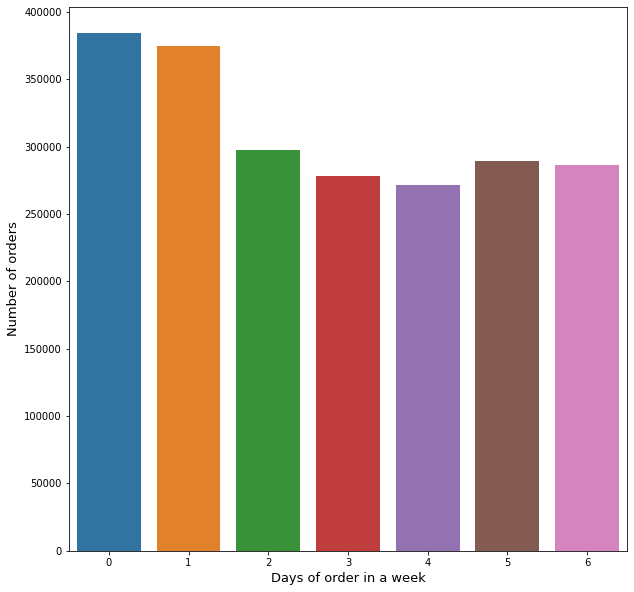

In [0]:
grouped = day_of_week['order_dow'].value_counts()
plt.subplots(figsize=(10, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()

From the graph we see that on 0th day of the week the customer orders the most.

# **2)When do customers order the most time of the day**


In [0]:
hour_of_day=orders.drop(['Unnamed: 0','days_since_prior_order','eval_set','order_dow','order_number','user_id'],axis=1)

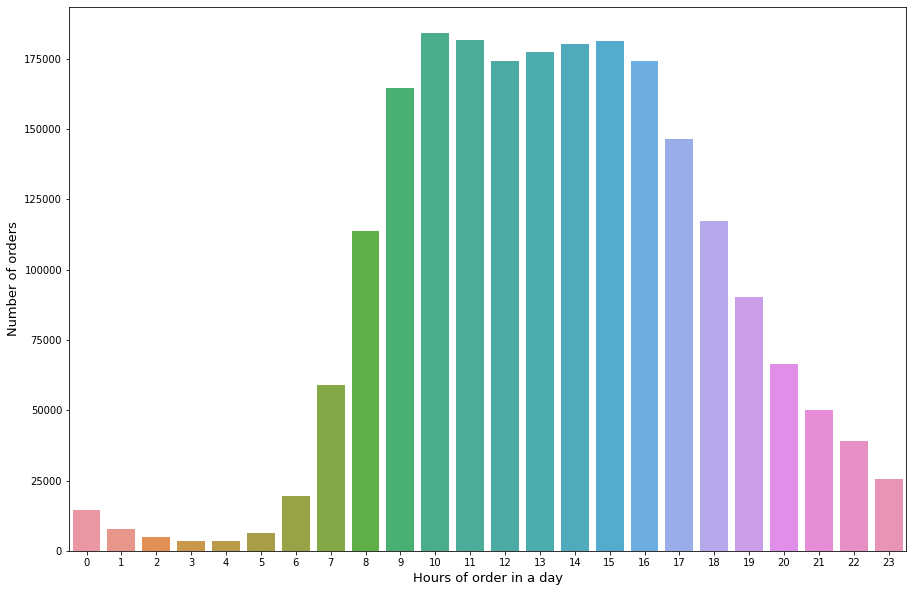

In [0]:
grouped = hour_of_day['order_hour_of_day'].value_counts()
plt.subplots(figsize=(15, 10))
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

From the above graph we see that the customer orders the most between 10 to 15 

# **3) Combination of above two**

In [0]:
combo=pd.merge(left=day_of_week,right=hour_of_day,how='left')
combo.tail()

,order_dow,order_id,order_hour_of_day
2195493,3,1270192,9
2195494,3,1267262,8
2195495,3,1267262,8
2195496,2,2092941,10
2195497,2,2092941,10


In [0]:
combo.shape

(2195498, 3)

In [0]:
combo.isnull().sum()

order_dow            0
order_id             0
order_hour_of_day    0
dtype: int64

In [0]:
combo.groupby('order_dow')['order_hour_of_day'].value_counts().head(30)

order_dow  order_hour_of_day
0          14                   35116
           15                   34659
           13                   34409
           12                   32987
           11                   32784
           16                   32077
           10                   31232
           9                    26247
           17                   25700
           18                   19033
           8                    18025
           19                   14628
           20                   11698
           21                    9317
           7                     8036
           22                    7071
           23                    4353
           0                     2567
           6                     2092
           1                     1568
           2                      957
           5                      778
           3                      667
           4                      525
1          10                   35709
           11        

In [0]:
top_combo = combo.groupby('order_dow')['order_hour_of_day'].value_counts().sort_values(ascending=False).head(5)

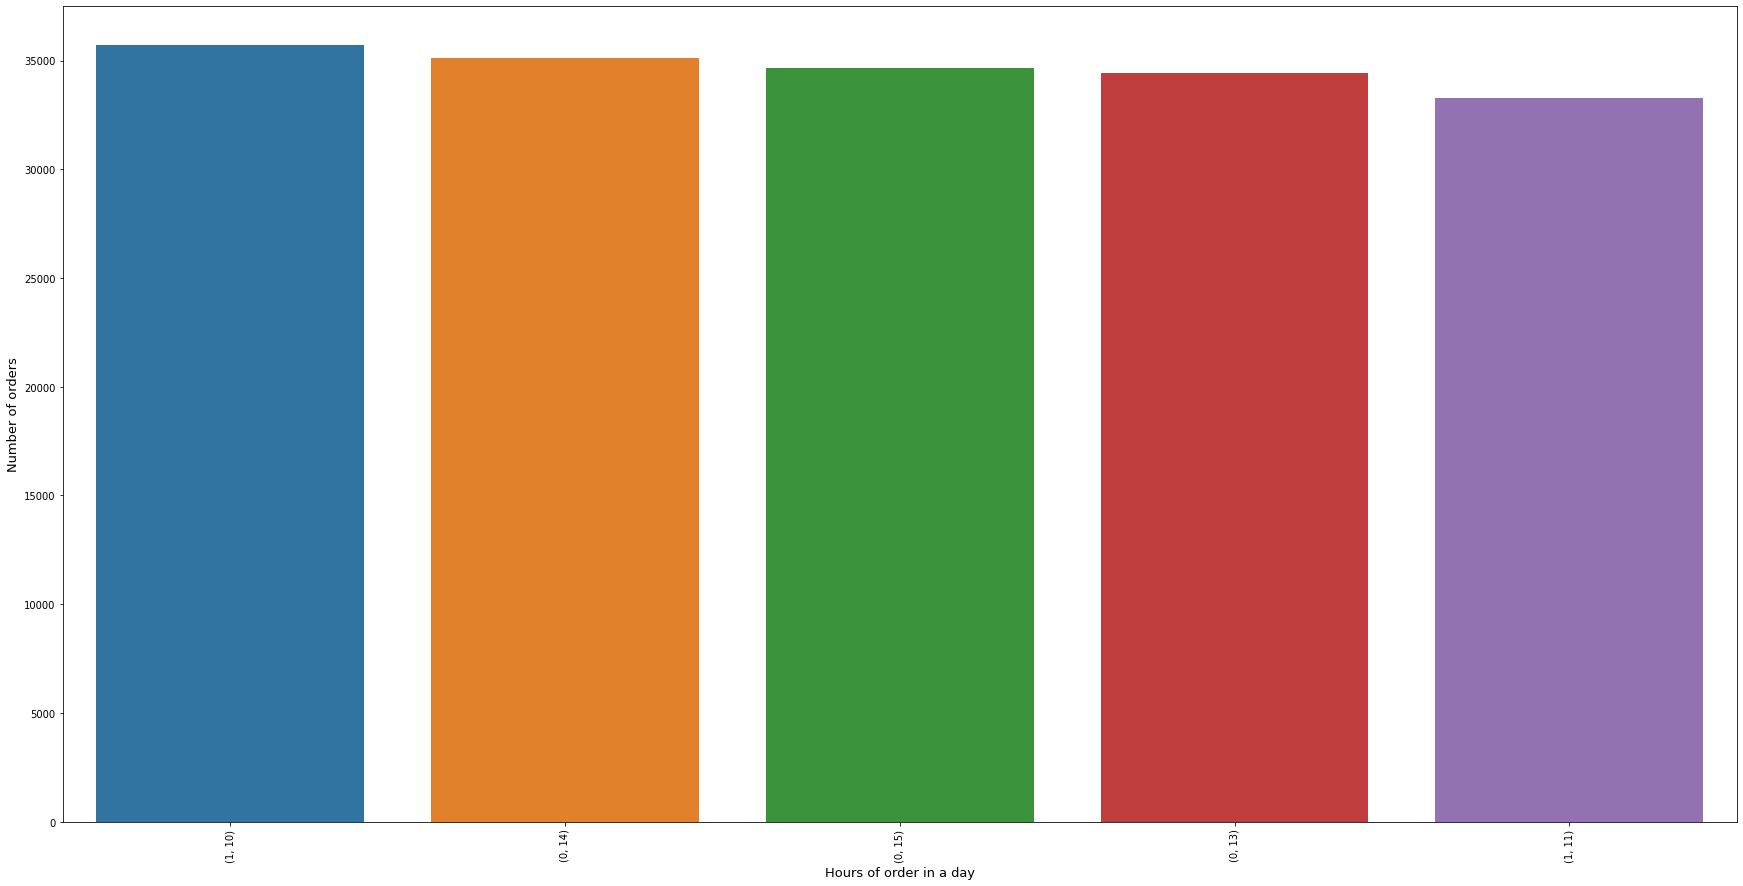

In [0]:
plt.subplots(figsize=(30, 15))
plt.xticks(rotation='vertical')
sns.barplot(top_combo.index, top_combo.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Hours of order in a day', fontsize=13)
plt.show()

From the above graph on the 1st day and 10th hour highest purchase was done

In [0]:
combo.head(30)

order_dow
0    386526
1    377296
2    299443
5    291282
6    287872
Name: order_hour_of_day, dtype: int64

# **4) What are the top 5 products that are ordered.**

In [0]:
order_product_reorder = prior.drop(['order_id','add_to_cart_order'],axis=1)

In [0]:
product_names = products.drop(['aisle_id','department_id'],axis=1)

In [0]:
top_products = pd.merge(left = product_names, right = order_product_reorder, how='left')

In [0]:
top_products.head()

,product_id,product_name,reordered
0,1,Chocolate Sandwich Cookies,0.0
1,1,Chocolate Sandwich Cookies,1.0
2,1,Chocolate Sandwich Cookies,1.0
3,1,Chocolate Sandwich Cookies,0.0
4,1,Chocolate Sandwich Cookies,0.0


In [0]:
top_products = top_products.groupby('product_name')['product_id'].count().sort_values(ascending=False).head(5)

In [0]:
top_products

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Name: product_id, dtype: int64

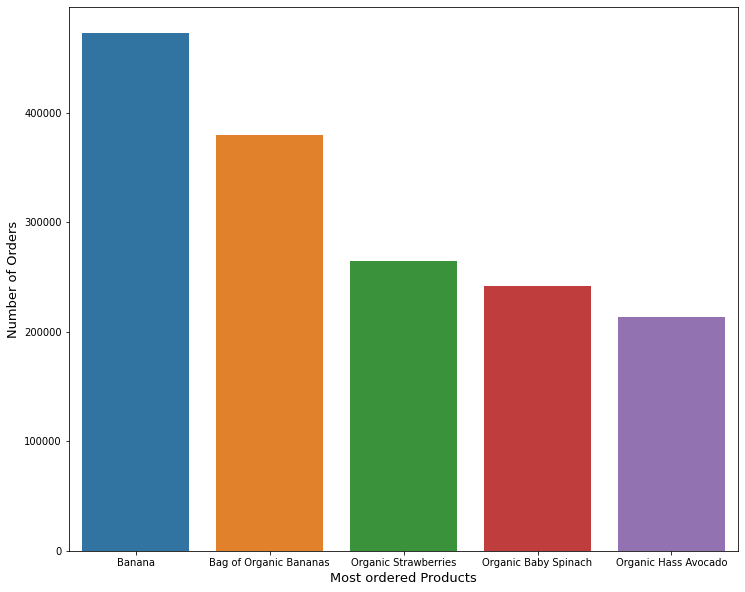

In [0]:
plt.subplots(figsize=(12, 10))
sns.barplot(top_products.index, top_products.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()


The top five reordered products are Bananas, Bag of Organis bananas, Organic Strawberries, Organic Baby Spinach, Organis Hass Avacado

# **5) What are the top 5 products that are reordered**

In [0]:
top_products_reordered = prior.groupby("product_id")["reordered"].aggregate(reorder_sum = 'sum',reorder_total = 'count').reset_index()
top_products_reordered['reorder_probability'] = top_products_reordered['reorder_sum'] / top_products_reordered['reorder_total']
top_products_reordered = pd.merge(top_products_reordered, products[['product_id', 'product_name']], how='left', on=['product_id'])
top_products_reordered = top_products_reordered.sort_values(by='reorder_probability', ascending=False)[:5]
top_products_reordered

ERROR! Session/line number was not unique in database. History logging moved to new session 60


,product_id,reorder_sum,reorder_total,reorder_probability,product_name
6430,6433,64,68,0.941176,Raw Veggie Wrappers
2074,2075,81,87,0.931034,Serenity Ultimate Extrema Overnight Pads
43545,43553,12,13,0.923077,Orange Energy Shots
27734,27740,93,101,0.920792,Chocolate Love Bar
14605,14609,32,35,0.914286,Soy Powder Infant Formula


# **6) What is the reorder ratio for each department?**

In [0]:
products_only = products.drop(['product_name','aisle_id'],axis=1)
order_prod = prior.drop(['add_to_cart_order','reordered'],axis=1)
dep_prod = pd.merge(left =departments, right=products_only,how='left')
dep_orderid = pd.merge(left=dep_prod,right=order_prod,how='left')
dep_orderid.head()

,department_id,department,product_id,order_id
0,1,frozen,4,13379.0
1,1,frozen,4,21260.0
2,1,frozen,4,43050.0
3,1,frozen,4,47541.0
4,1,frozen,4,53362.0


In [0]:
dep_orderid.shape

(32434500, 4)

In [0]:
dep_ratio=dep_orderid.groupby("department")["order_id"].aggregate(Total_orders= 'count')
dep_ratio['Ratio']=dep_ratio['Total_orders']/dep_ratio['Total_orders'].sum()
dep_ratio.sort_values(by='Ratio', ascending=False, inplace=True)
dep_ratio

,Total_orders,Ratio
department,,
produce,9479291,0.292260
dairy eggs,5414016,0.166922
snacks,2887550,0.089027
beverages,2690129,0.082940
frozen,2236432,0.068952
pantry,1875577,0.057827
bakery,1176787,0.036282
canned goods,1068058,0.032930
deli,1051249,0.032411


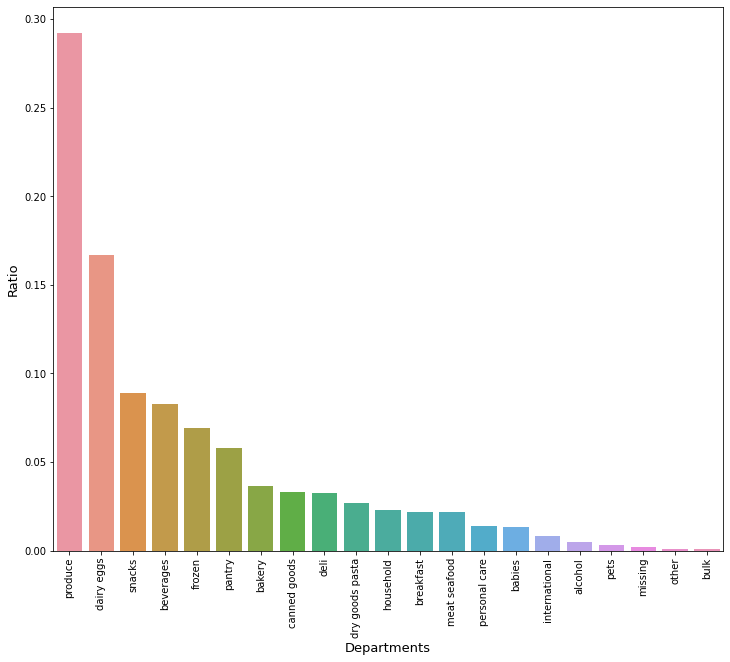

In [0]:
plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(dep_ratio.index, dep_ratio.Ratio)
plt.ylabel('Ratio', fontsize=13)
plt.xlabel('Departments', fontsize=13)
plt.show()